In [1]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import RegexpTokenizer as rt
from stop_words import get_stop_words
import re
from pymystem3 import Mystem
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


sns.set()
mystem = Mystem()

## Обработка текстов субтитров и прямой-косвенной речи романа: лемматизация, токенизация, удаление стоп-слов

In [2]:
'''Подгружаю стоп-слова и пунктуацию'''
stop_words = get_stop_words('ru')
for letter in range(1072,1104):
        stop_words.append(chr(letter))

stop_words = set(stop_words)
deleter_punct = rt('\w+')

In [3]:
'''функция для открытия документа'''
def open_doc(path_to_doc, encoding):
    with open(path_to_doc, encoding = encoding) as file:
        text = file.read()
        file.close()
    return text

In [4]:
'''функция для приведения строки к леммам, токенам, очистки ее от стоп-слов и пунктуации, 
на выходе - строка и список'''
def processed_text(original_text):
    lemmas = ' '.join(mystem.lemmatize(original_text))
    tokens = deleter_punct.tokenize(lemmas)
    without_punct_and_stopwords = []
    for word in tokens:
        if word not in stop_words:
            without_punct_and_stopwords.append(word)
    text = ' '.join(without_punct_and_stopwords)
    return without_punct_and_stopwords, text

In [26]:
'''функция для сохранения текста'''
def save_text(text, name):
    with open("Text_Documents/Processed_{}.txt".format(name), "w") as file:
        file.write(text)

In [6]:
!cd /
!ls

AK_1967_P1.srt                          Anna_Karenina.txt
AK_1967_P2.srt                          Anna_Karenina_Work_with_Texts.ipynb
AK_Subtitles_Preprocessing_for_TM.ipynb Text_documents


In [21]:
original_text = open_doc('Anna_Karenina.txt', 'utf8')

original_text_part_1 = open_doc('Text_Documents/Reported_and_Directed_speech_in_Anna_Karenina_Part_1.txt', 'utf8')
original_text_part_2 = open_doc('Text_Documents/Reported_and_Directed_speech_in_Anna_Karenina_Part_2.txt', 'utf8')
original_text_part_3 = open_doc('Text_Documents/Reported_and_Directed_speech_in_Anna_Karenina_Part_3.txt', 'utf8')
original_text_part_4 = open_doc('Text_Documents/Reported_and_Directed_speech_in_Anna_Karenina_Part_4.txt', 'utf8')
original_text_part_5 = open_doc('Text_Documents/Reported_and_Directed_speech_in_Anna_Karenina_Part_5.txt', 'utf8')
original_text_part_6 = open_doc('Text_Documents//Reported_and_Directed_speech_in_Anna_Karenina_Part_6.txt', 'utf8')
original_text_part_7 = open_doc('Text_Documents/Reported_and_Directed_speech_in_Anna_Karenina_Part_7.txt', 'utf8')
original_text_part_8 = open_doc('Text_Documents/Reported_and_Directed_speech_in_Anna_Karenina_Part_8.txt', 'utf8')

sub_1967 = open_doc('Text_Documents/Subtitles_1967.txt', 'utf8')

In [22]:
lst_of_processed_original_text, processed_original_text = processed_text(original_text)

lst_of_processed_original_text_part_1, processed_original_text_part_1 = processed_text(original_text_part_1)
lst_of_processed_original_text_part_2, processed_original_text_part_2 = processed_text(original_text_part_2)
lst_of_processed_original_text_part_3, processed_original_text_part_3 = processed_text(original_text_part_3)
lst_of_processed_original_text_part_4, processed_original_text_part_4 = processed_text(original_text_part_4)
lst_of_processed_original_text_part_5, processed_original_text_part_5 = processed_text(original_text_part_5)
lst_of_processed_original_text_part_6, processed_original_text_part_6 = processed_text(original_text_part_6)
lst_of_processed_original_text_part_7, processed_original_text_part_7 = processed_text(original_text_part_7)
lst_of_processed_original_text_part_8, processed_original_text_part_8 = processed_text(original_text_part_8)

lst_of_processed_sub_1967, processed_sub_1967 = processed_text(sub_1967)

In [28]:
save_subtitles(processed_sub_1967, 'Subtitles_1967')

save_subtitles(processed_original_text_part_1, 'Novel_Part_1')
save_subtitles(processed_original_text_part_2, 'Novel_Part_2')
save_subtitles(processed_original_text_part_3, 'Novel_Part_3')
save_subtitles(processed_original_text_part_4, 'Novel_Part_4')
save_subtitles(processed_original_text_part_5, 'Novel_Part_5')
save_subtitles(processed_original_text_part_6, 'Novel_Part_6')
save_subtitles(processed_original_text_part_7, 'Novel_Part_7')
save_subtitles(processed_original_text_part_8, 'Novel_Part_8')

## Подсчеты разных статистик

In [29]:
'''словарь размерности моих документов'''

dict_of_sub_size = {"\n Part I:" : len(lst_of_processed_original_text_part_1),
      "\n Part II:" : len(lst_of_processed_original_text_part_2),
      "\n Part III:" : len(lst_of_processed_original_text_part_3),
      "\n Part IV:": len(lst_of_processed_original_text_part_4),
      "\n Part V:": len(lst_of_processed_original_text_part_5),
      "\n Part VI:": len(lst_of_processed_original_text_part_6),
      "\n Part VII:": len(lst_of_processed_original_text_part_7),
      "\n Part VIII:": len(lst_of_processed_original_text_part_8),

      "\n Subtitles of 1967:": len(lst_of_processed_sub_1967)}

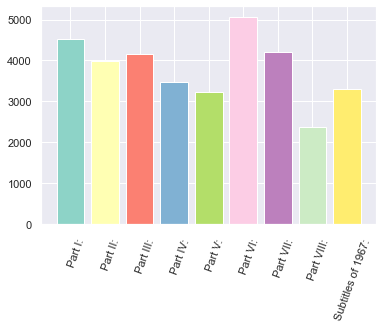

In [30]:
'''просто график с тем, сколько где слов после удаления стоп слов и прочего - можно сравнить с тем, 
сколько до того,как я убрала стоп-слова'''
jet = plt.get_cmap('Set3')
N = len(dict_of_sub_size)
plt.bar(range(N), dict_of_sub_size.values(), align='center', color=jet(np.linspace(0, 1.0, N)))
plt.xticks(range(N), dict_of_sub_size.keys(), rotation=70)
plt.show()

In [31]:
'''функция для подсчета количества слов в тексте и создания словаря слово:число'''
def counting_words(list_of_words):
    dict_with_quantity = {}
    for word in list_of_words:
        if word in dict_with_quantity:
            dict_with_quantity[word] +=1
        else:
            dict_with_quantity[word]=1
    return dict_with_quantity

In [32]:
'''функция для сортировки словаря и заодно для создания из словаря датафрейма на всякий случай'''
def creating_sorted_dict_with_word_and_freq(dict_with_quantity):
    dict_with_counted_words = {key: value for key, value in sorted(dict_with_quantity.items(), key=lambda item: item[1], reverse=True)}
    dict_for_dataframe = [[word, num] for word, num in dict_with_counted_words.items()]
    return dict_with_counted_words, dict_for_dataframe

In [33]:
'''тут можно создать дф и сохранить наши данные'''
def count_word_list_to_pandas(dict_for_dataframe):
    table_counted_words = pd.DataFrame(dict_for_dataframe, columns=['Слово', 'Частотность'])
    table_counted_words.to_csv('Dictionary.tsv', sep='\t')
    return table_counted_words 

In [34]:
'''функция для визуализации'''
def visualization(x, index=30):
    words = []
    numbers = []
    for data in x:
        words.append(data[0])
        numbers.append(data[1])
    plt.figure(figsize = (10,5))    
    plt.scatter(words[:index], numbers[:index])
    plt.title('Самые частотные слова', fontsize=30)
    plt.ylabel('Количество', fontsize=18)
    plt.xlabel('Слова', fontsize=18)
    plt.tight_layout()
    plt.xticks(rotation=90, fontsize = 14)
    plt.yticks(fontsize = 14)
    

In [35]:
count_origin, dict_for_df_origin = creating_sorted_dict_with_word_and_freq(counting_words(lst_of_processed_original_text))
count_1967, dict_for_df_1967 = creating_sorted_dict_with_word_and_freq(counting_words(lst_of_processed_sub_1967))
# count_1997, dict_for_df_1997 = creating_sorted_dict_with_word_and_freq(counting_words(lst_of_processed_sub_1997))
# count_2012, dict_for_df_2012 = creating_sorted_dict_with_word_and_freq(counting_words(lst_of_processed_sub_2012))

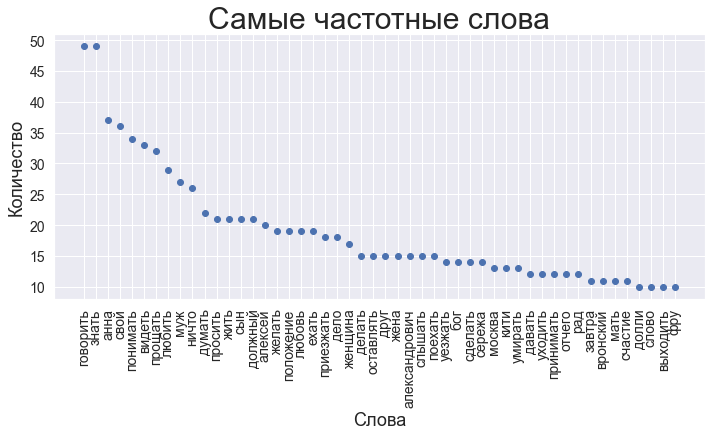

In [36]:
visualization(dict_for_df_1967, index=50)


Тут стоит посмотерть, какие слова общие для всех субтитров и оригинала, а потом например вывести их и вывести n слов, которые уникальны и популярны для конкретного текста